# TASK 02


In [1]:
import zipfile
import os

In [2]:
zip_path=r"C:\Users\Lenovo\Downloads\titanic.zip"
extract_path=r"C:\Users\Lenovo\Downloads\titanic"

In [3]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [4]:
extracted_files = os.listdir(extract_path)
print("Extracted files:", extracted_files)

Extracted files: ['gender_submission.csv', 'test.csv', 'train.csv']


In [5]:
import pandas as pd

In [6]:
import os

extract_path = r"C:\Users\Lenovo\Downloads\titanic"  
train_path = os.path.join(extract_path, "train.csv")


train_df = pd.read_csv(train_path)


train_df.info()


print(train_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                           

In [8]:

missing_values = train_df.isnull().sum()


train_df_cleaned = train_df.drop(columns=["Cabin"])


train_df_cleaned["Age"].fillna(train_df_cleaned["Age"].median(), inplace=True)  
train_df_cleaned["Embarked"].fillna(train_df_cleaned["Embarked"].mode()[0], inplace=True)  


missing_values_after = train_df_cleaned.isnull().sum()

missing_values, missing_values_after

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 PassengerId    0
 Survived       0
 Pclass         0
 Name           0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Ticket         0
 Fare           0
 Embarked       0
 dtype: int64)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
sns.set_style("whitegrid")

# plot survival count

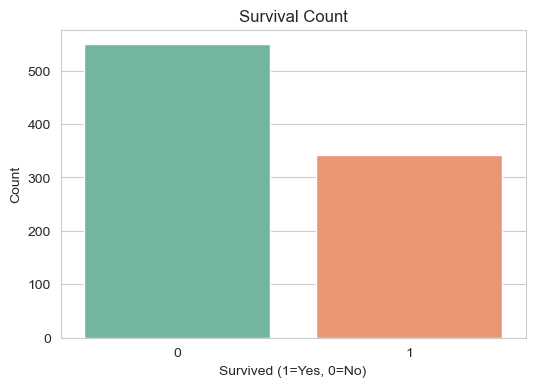

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=train_df_cleaned, palette="Set2")
plt.title("Survival Count")
plt.xlabel("Survived (1=Yes, 0=No)")
plt.ylabel("Count")
plt.show()

# Plot survival rate by passenger class

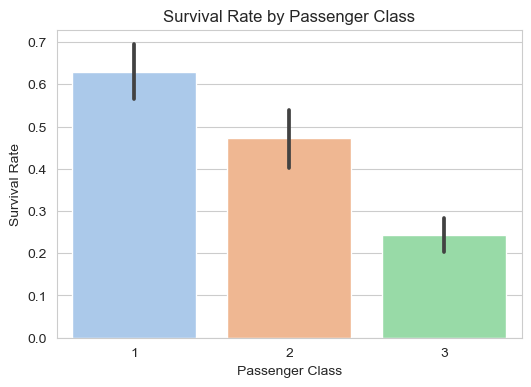

In [12]:
plt.figure(figsize=(6,4))
sns.barplot(x="Pclass", y="Survived", data=train_df_cleaned, palette="pastel")
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

# Plot survival rate by gender

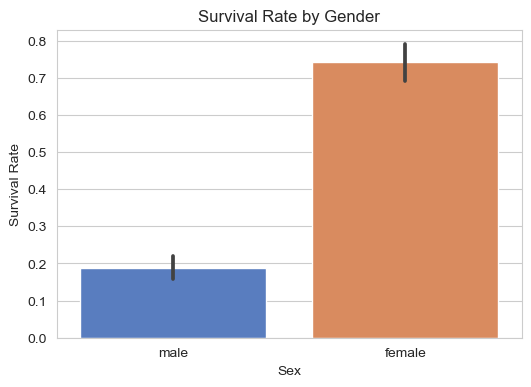

In [14]:
plt.figure(figsize=(6,4))
sns.barplot(x="Sex", y="Survived", data=train_df_cleaned, palette="muted")
plt.title("Survival Rate by Gender")
plt.xlabel("Sex")
plt.ylabel("Survival Rate")
plt.show()